In [1]:
import numpy as np
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
teste = Robot((
    [theta1, l1, 0, rad(90)],
    [theta2, 0, l2, 0]
))

### $$\text{Obtenção de } o_i^0 \text{ :}$$

In [3]:
n = len(teste.T) #número de juntas

o = [Matrix([[0], [0], [0]])]
for i in range(1, n+1):
    o.append(simplify(teste.HTM(0, i)[:3, 3]))

o

⎡⎡0⎤  ⎡0 ⎤  ⎡ c₁⋅c₂⋅l₂ ⎤⎤
⎢⎢ ⎥  ⎢  ⎥  ⎢          ⎥⎥
⎢⎢0⎥, ⎢0 ⎥, ⎢ c₂⋅l₂⋅s₁ ⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢          ⎥⎥
⎣⎣0⎦  ⎣l₁⎦  ⎣l₁ + l₂⋅s₂⎦⎦

### $$\text{Obtenção de } Z_{i-1}^0 = R_{i-1}^0k \text{ :}$$

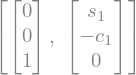

In [4]:
z = [Matrix([[0], [0], [1]])]
for i in range(1, n):
    z.append(simplify(teste.HTM(0, i)[:3, 2]))

z

### $$\text{Obtenção do Jacobiano de velocidades lineares } J_{v_i} = z_{i-1}^0 \times \left( o_n^0 - o_{i-1}^0 \right) \text{ :}$$

In [5]:
jv = []
for i in range(1, n+1):
    if(teste.rotational[i-1]):
        jv.append(simplify(Matrix(np.cross(np.squeeze(z[i-1]), np.squeeze(o[-1] - o[i-1])).tolist())))
    else:
        jv.append(simplify(z[i-1]))

jv

⎡             ⎡    -c₁⋅l₂⋅s₂    ⎤⎤
⎢⎡-c₂⋅l₂⋅s₁⎤  ⎢                 ⎥⎥
⎢⎢         ⎥  ⎢    -l₂⋅s₁⋅s₂    ⎥⎥
⎢⎢c₁⋅c₂⋅l₂ ⎥, ⎢                 ⎥⎥
⎢⎢         ⎥  ⎢      ⎛  2     2⎞⎥⎥
⎣⎣    0    ⎦  ⎣c₂⋅l₂⋅⎝c₁  + s₁ ⎠⎦⎦

### $$\text{Obtenção do Jacobiano de velocidades angulares } J_{\omega_i} = z_{i-1}^0 \text{ :}$$

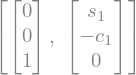

In [6]:
jw = []
for i in range(1, n+1):
    if(teste.rotational[i-1]):
        jw.append(simplify(z[i-1]))
    else:
        jw.append(Matrix([[0], [0], [0]]))

jw

### $$\text{Obtenção do Jacobiano de velocidades completo, tal que } \xi = J(q)\dot{q} \text{ :}$$

In [7]:
J = []
for k in range(3):
    J.append([])
    for i in range(n):
        J[k].append(simplify(jv[i][k]))
for k in range(3):
    J.append([])
    for i in range(n):
        J[k+3].append(simplify(jw[i][k]))

Matrix(J)

⎡-c₂⋅l₂⋅s₁      -c₁⋅l₂⋅s₂    ⎤
⎢                            ⎥
⎢c₁⋅c₂⋅l₂       -l₂⋅s₁⋅s₂    ⎥
⎢                            ⎥
⎢                 ⎛  2     2⎞⎥
⎢    0      c₂⋅l₂⋅⎝c₁  + s₁ ⎠⎥
⎢                            ⎥
⎢    0             s₁        ⎥
⎢                            ⎥
⎢    0             -c₁       ⎥
⎢                            ⎥
⎣    1              0        ⎦